In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
%cd /content/drive/MyDrive/diekim/shinhan_shelip

/content/drive/MyDrive/diekim/shinhan_shelip


### __장바구니 분석__

In [ ]:
##라이브러리 로드
!pip install mlxtend==0.21.0
import mlxtend
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdmㄴ
import warnings
warnings.filterwarnings(action='ignore')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory

이후 런타임 재시작

In [ ]:
##데이터 로드
df = pd.read_csv('data_040/data_040.csv', encoding='euc-kr')
df.head(2)

,P1,P2,P3,P4,P5,P6,P7,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,B13,B14,B15,B16,B17,B18,B19,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B30,B31,B32,B33,B34,B35,B36,B37,B38,B39,B40,B41,B42,B43,B44,B45,B46,B47,B48,B49,B50,B51,B52,B53,B54,B55,B56,B57,B58,B59,B60,B61,B62,B63,B64,B65,B66,B67,B68,B69,B70,B71,B72,B73,B74,B75,B76,B77,B78,B79,B80,B81,B82,B83,B84,B85,B86,B87,B88,B89,B90,B91,B92,B93,B94,B95,B96,B97,B98,B99,B100,B101,B102,B103,B104,B105,B106,B107,B108,B109,B110,B111,B112,B113,B114,B115,B116,B117,B118,B119,B120,B121,B122,B123,B124,B125,B126,B127,B128,B129,B130,B131,B132,B133,B134,B135,B136,B137,B138,B139,B140,B141,B142,B143,B144,B145,B146,B147,B148,B149,B150,B151,B152,B153,B154,B155,B156,B157,B158,B159,B160,B161,B162,B163,B164,B165,B166,B167,C1,E1,E2,E3,E4,E5,E6
0,M,20대_후,1,1,0,0,A은행,0,0,0,0,190000,0,101000,0,54000,0,341000,0,24000,0,0,78000,267000,0,0,17000,0,0,0,0,0,0,0,0,0,0,0,0,135000,764000,909000,20000,38000,0,0,22000,184000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78000,0,0,283000,0,348000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31000,0,0,0,0,0,0,0,0,0,0,0,0,60000,0,0,0,0,0,0,0,0,70000,76000,0,0,0,0,4350000,210,0,0,11111111110,0,111111111111,1100000000
1,M,50대_후,1,0,0,0,A은행,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,158000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,146000,6000,0,0,0,0,0,4000,184000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,580000,40,0,0,0,0,111110111111,10000000000


In [ ]:
##아이템 행렬 생성
items = df.columns[7:-8]
arrs = []
for i in tqdm(range(len(df))):
  arr = []
  for j in items:
    if df.loc[i, j] != 0:
      arr.append(j) 
  arrs.append(arr)

100%|██████████| 473228/473228 [15:52<00:00, 496.86it/s]


In [ ]:
##데이터 프레임 생성
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(arrs).transform(arrs)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,B1,B10,B100,B101,B102,B103,B104,B105,B106,B107,B108,B109,B11,B110,B112,B113,B114,B115,B116,B117,B118,B119,B12,B120,B121,B122,B123,B124,B125,B126,B127,B128,B129,B13,B130,B131,B132,B133,B134,B135,B136,B137,B138,B139,B14,B140,B141,B142,B143,B144,B145,B146,B147,B148,B149,B15,B150,B151,B152,B153,B154,B155,B156,B157,B158,B159,B16,B160,B161,B162,B163,B164,B165,B166,B17,B18,B19,B2,B20,B21,B22,B23,B24,B25,B26,B27,B28,B29,B3,B30,B31,B32,B33,B34,B35,B36,B37,B38,B39,B4,B40,B41,B42,B43,B44,B45,B46,B47,B48,B49,B5,B50,B51,B52,B53,B54,B55,B56,B57,B58,B59,B6,B60,B61,B62,B63,B64,B65,B66,B67,B68,B69,B7,B70,B71,B72,B73,B74,B75,B76,B77,B78,B79,B8,B80,B81,B82,B83,B84,B85,B86,B87,B88,B89,B9,B90,B91,B92,B93,B94,B95,B96,B97,B98,B99
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [ ]:
##apriori 알고리즘 적용
%%time
from mlxtend.frequent_patterns import apriori
apriori_results = apriori(df, min_support=0.5, use_colnames=True).sort_values(by='support', ascending=False)
apriori_results

CPU times: user 432 ms, sys: 19 ms, total: 451 ms
Wall time: 455 ms


,support,itemsets
0,0.751986,(B15)
4,0.724391,(B35)
1,0.721160,(B17)
5,0.714167,(B41)
12,0.600444,"(B41, B35)"
8,0.599094,"(B35, B15)"
10,0.589289,"(B35, B17)"
11,0.589046,"(B41, B17)"
9,0.588847,"(B41, B15)"
7,0.587362,"(B17, B15)"


In [ ]:
##fp-growth 알고리즘 적용
%%time
from mlxtend.frequent_patterns import fpgrowth
fpgrowth_results = fpgrowth(df, min_support=0.5, use_colnames=True).sort_values(by='support', ascending=False)
fpgrowth_results

CPU times: user 4.06 s, sys: 24 ms, total: 4.08 s
Wall time: 4.09 s


,support,itemsets
6,0.751986,(B15)
0,0.724391,(B35)
1,0.721160,(B17)
2,0.714167,(B41)
10,0.600444,"(B41, B35)"
7,0.599094,"(B35, B15)"
8,0.589289,"(B35, B17)"
11,0.589046,"(B41, B17)"
12,0.588847,"(B41, B15)"
9,0.587362,"(B17, B15)"


In [ ]:
##association rules 발견
from mlxtend.frequent_patterns import association_rules
association_results = association_rules(fpgrowth_results, metric="confidence", min_threshold=0.1) 
association_results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(B41),(B35),0.714167,0.724391,0.600444,0.840761,1.160646,0.083108,1.730791
1,(B35),(B41),0.724391,0.714167,0.600444,0.828895,1.160646,0.083108,1.670514
2,(B35),(B15),0.724391,0.751986,0.599094,0.827031,1.099796,0.054362,1.433865
3,(B15),(B35),0.751986,0.724391,0.599094,0.796682,1.099796,0.054362,1.355556
4,(B35),(B17),0.724391,0.721160,0.589289,0.813496,1.128038,0.066887,1.495088
5,(B17),(B35),0.721160,0.724391,0.589289,0.817141,1.128038,0.066887,1.507219
6,(B41),(B17),0.714167,0.721160,0.589046,0.824801,1.143714,0.074017,1.591562
7,(B17),(B41),0.721160,0.714167,0.589046,0.816804,1.143714,0.074017,1.560252
8,(B41),(B15),0.714167,0.751986,0.588847,0.824523,1.096460,0.051803,1.413366
9,(B15),(B41),0.751986,0.714167,0.588847,0.783056,1.096460,0.051803,1.317539


### __워드클라우드__

In [6]:
##라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict
from pandas import read_table
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
from wordcloud import WordCloud

In [7]:
##데이터 로드
df = pd.read_csv('data_040/data_040.csv', encoding='euc-kr')
df2 =  pd.read_csv('word.csv')

In [8]:
##데이터 전처리
#기준 데이터
df = pd.concat([df.iloc[:, 1], df.iloc[:, 7:-8]], axis=1)
df = df.melt(id_vars='P2')
display(df.head(2))
#단어 데이터
df2['word'] = [s[3:] for s in df2['word']]
display(df2.head(2))
#데이터 병합
res = pd.merge(df, df2, left_on='variable', right_on='col', how='left')
res.drop(['variable'], axis=1, inplace=True)
display(res.head(2))
res.to_csv('wordcloud_data.csv', encoding='utf-8-sig', index=False)

,P2,variable,value
0,20대_후,B1,0
1,50대_후,B1,0


,col,word
0,B1,특급호텔
1,B2,1급호텔


,P2,value,col,word
0,20대_후,0,B1,특급호텔
1,50대_후,0,B1,특급호텔


In [9]:
##데이터 저장
#res.to_csv('wordcloud_data.csv', encoding='utf-8-sig', index=False)
df = pd.read_csv('wordcloud_data.csv')

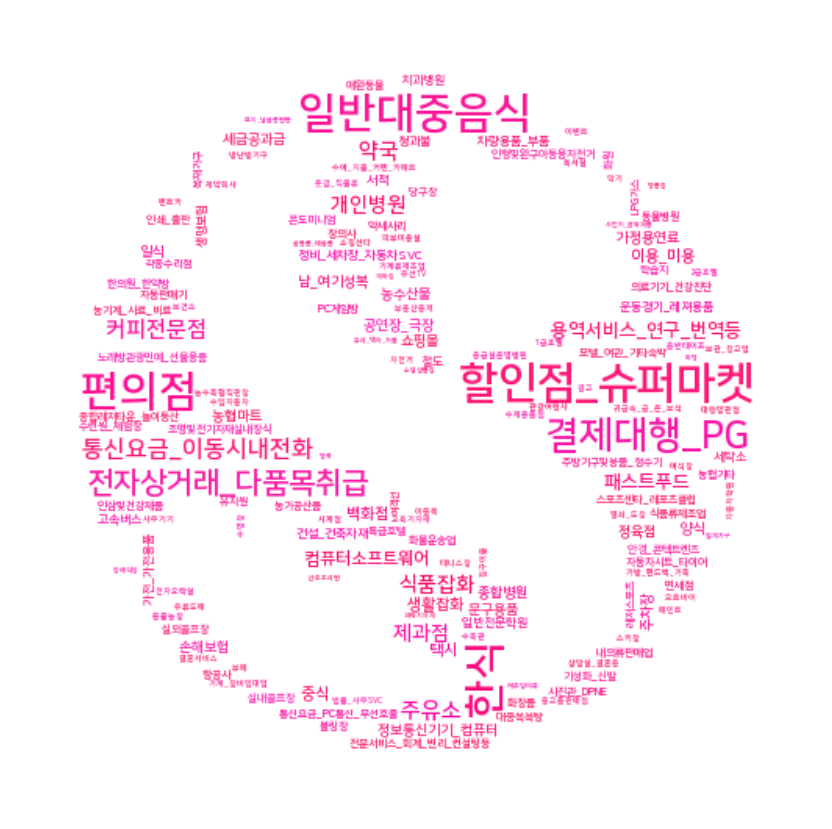

In [10]:
##all
#워드카운트
df = df[df['value']!=0]
count = Counter(df['word'].tolist()).most_common()
count = pd.DataFrame(count)    
count.columns = ['word','count'] 

#워드클라우드 hsl(328, 100%, 54%)
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(320,340),np.random.randint(95, 100),np.random.randint(50,55)))

icon = Image.open('/content/drive/MyDrive/diekim/shinhan_shelip/shc_symbol_ci.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

data = dict(zip(count['word'].tolist(), count['count'].tolist()))
wc = WordCloud(font_path='/content/drive/MyDrive/NanumSquareB.ttf',   #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask)                                             #마스크설정                   

cloud = wc.generate_from_frequencies(data)                            #사전형태의 데이터 넣기
#image_colors = ImageColorGenerator(mask)                              #마스킹에 맞춰서 색상 설정 

plt.figure(figsize=(15,15))                                          #액자사이즈설정
plt.axis('off')   
plt.imshow(wc.recolor(color_func=color_func),interpolation="bilinear")
plt.savefig('/content/drive/MyDrive/diekim/shinhan_shelip/wc_all.png')

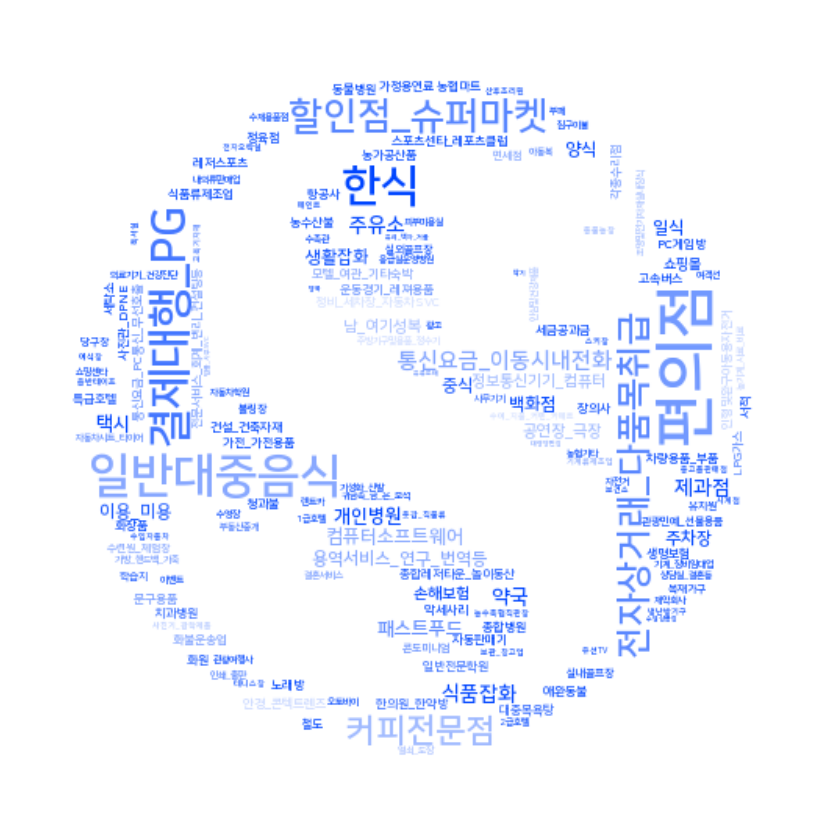

In [11]:
##MZ
#워드카운트
df = df[df['value']!=0]
mz = df[(df['P2']=='20대_초')|(df['P2']=='20대_후')|(df['P2']=='30대_초')|(df['P2']=='30대_후')]
count = Counter(mz['word'].tolist()).most_common()
count = pd.DataFrame(count)    
count.columns = ['word','count'] 
count

#워드클라우드
icon = Image.open('/content/drive/MyDrive/diekim/shinhan_shelip/shc_symbol_ci.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

data = dict(zip(count['word'].tolist(), count['count'].tolist()))
wc = WordCloud(font_path='/content/drive/MyDrive/NanumSquareB.ttf',   #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask)                                             #마스크설정                   

cloud = wc.generate_from_frequencies(data)                            #사전형태의 데이터 넣기
image_colors = ImageColorGenerator(mask)                              #마스킹에 맞춰서 색상 설정 

plt.figure(figsize=(15,15))                                          #액자사이즈설정
plt.axis('off')   
plt.imshow(wc.recolor(color_func=image_colors),interpolation="bilinear")
plt.savefig('/content/drive/MyDrive/diekim/shinhan_shelip/wc_mz.png')

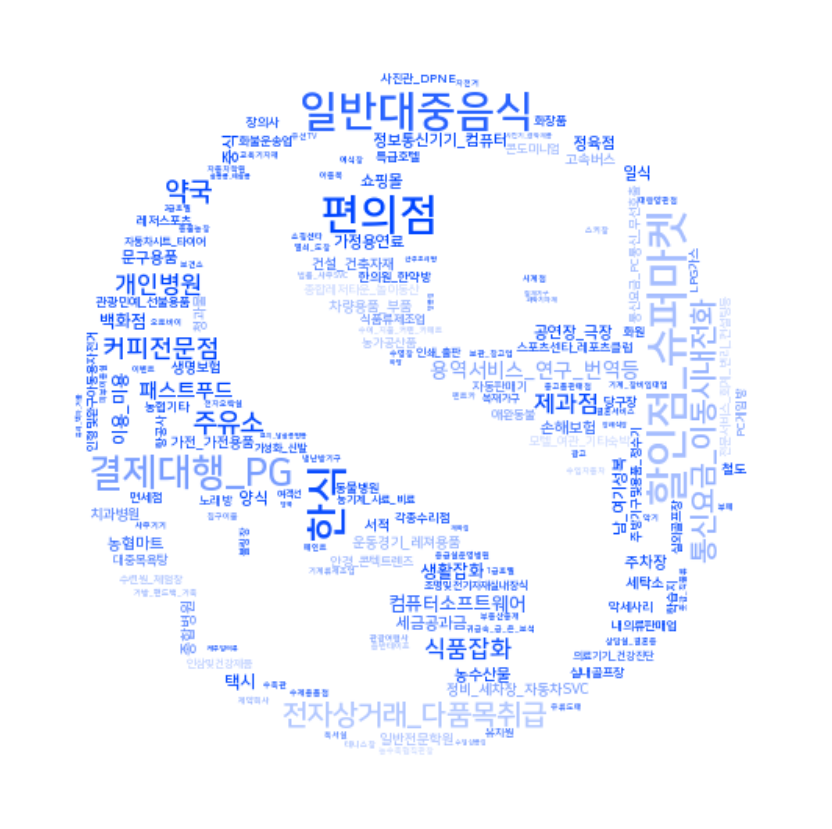

In [12]:
##YOLD
#워드카운트
df = df[df['value']!=0]
yold = df[~((df['P2']=='20대_초')&(df['P2']=='20대_후')&(df['P2']=='30대_초')&(df['P2']=='30대_후'))]
count = Counter(yold['word'].tolist()).most_common()
count = pd.DataFrame(count)    
count.columns = ['word','count'] 
count

#워드클라우드
icon = Image.open('/content/drive/MyDrive/diekim/shinhan_shelip/shc_symbol_ci.png')
mask = Image.new("RGB", icon.size, (255,255,255))
mask.paste(icon,icon)
mask = np.array(mask)

data = dict(zip(count['word'].tolist(), count['count'].tolist()))
wc = WordCloud(font_path='/content/drive/MyDrive/NanumSquareB.ttf',   #폰트
               background_color='white',                              #배경색
               width=800, height=600 ,                                #사이즈설정
               max_words=200,                                         #단어갯수
               mask=mask)                                             #마스크설정                   

cloud = wc.generate_from_frequencies(data)                            #사전형태의 데이터 넣기
image_colors = ImageColorGenerator(mask)                              #마스킹에 맞춰서 색상 설정 

plt.figure(figsize=(15,15))                                          #액자사이즈설정
plt.axis('off')   
plt.imshow(wc.recolor(color_func=image_colors),interpolation="bilinear")
plt.savefig('/content/drive/MyDrive/diekim/shinhan_shelip/wc_yold.png')

In [ ]:
s